In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [7]:
crop=pd.read_csv('crop-data.csv')

In [8]:
crop.head()

,county,item,season,temp,rainfall,ph,yield
0,Baringo,Sorghum,Long Rains,20.879744,202.935536,6.502985,2.08
1,Bomet,Sorghum,Long Rains,21.770462,226.655537,7.038096,2.05
2,Bungoma,Sorghum,Short Rains,23.004459,263.964248,7.840207,2.28
3,Busia,Sorghum,Short Rains,26.491096,242.864034,6.980401,3.43
4,Elgeyo Marakwet,Sorghum,Long Rains,20.130175,262.717340,7.628473,3.32


In [9]:
crop.shape

(690, 7)

In [10]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   county    690 non-null    object 
 1   item      690 non-null    object 
 2   season    690 non-null    object 
 3   temp      690 non-null    float64
 4   rainfall  690 non-null    float64
 5   ph        690 non-null    float64
 6   yield     690 non-null    float64
dtypes: float64(4), object(3)
memory usage: 37.9+ KB


In [11]:
backup=crop.copy()

In [12]:
crop['yield']=crop['yield'].astype(float)

In [13]:
crop['county']=crop['county'].str.replace(',','').astype(object)

In [14]:
crop['item']=crop['item'].str.replace('_','').astype(object)

In [15]:
crop['county']=crop['county'].str.replace('/','').astype(object)

In [16]:
crop=crop.reset_index(drop=True)

In [17]:
crop

,county,item,season,temp,rainfall,ph,yield
0,Baringo,Sorghum,Long Rains,20.879744,202.935536,6.502985,2.08
1,Bomet,Sorghum,Long Rains,21.770462,226.655537,7.038096,2.05
2,Bungoma,Sorghum,Short Rains,23.004459,263.964248,7.840207,2.28
3,Busia,Sorghum,Short Rains,26.491096,242.864034,6.980401,3.43
4,Elgeyo Marakwet,Sorghum,Long Rains,20.130175,262.717340,7.628473,3.32
...,...,...,...,...,...,...,...
685,Trans Nzoia,Tomatoes,Short Rains,27.385390,58.299331,6.702772,0.04
686,Turkana,Tomatoes,Short Rains,27.930349,43.250956,7.011031,0.15
687,Uasin Gishu,Tomatoes,Short Rains,29.280862,44.474274,6.890156,0.06
688,Vihiga,Tomatoes,Short Rains,28.997315,59.844992,6.821747,0.08


In [18]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   county    690 non-null    object 
 1   item      690 non-null    object 
 2   season    690 non-null    object 
 3   temp      690 non-null    float64
 4   rainfall  690 non-null    float64
 5   ph        690 non-null    float64
 6   yield     690 non-null    float64
dtypes: float64(4), object(3)
memory usage: 37.9+ KB


In [19]:
crop.describe(include='all')

,county,item,season,temp,rainfall,ph,yield
count,690,690,690,690.000000,690.000000,690.000000,690.000000
unique,52,15,2,NaN,NaN,NaN,NaN
top,Meru,Peagon Peas,Long Rains,NaN,NaN,NaN,NaN
freq,21,94,346,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,24.155234,108.876395,6.440101,2.999638
std,NaN,NaN,NaN,4.681296,65.245711,1.047757,2.768853
min,NaN,NaN,NaN,15.330426,30.920140,3.504752,0.010000
25%,NaN,NaN,NaN,19.985073,63.124348,5.759853,0.770000
50%,NaN,NaN,NaN,24.016615,86.134978,6.364551,2.135000
75%,NaN,NaN,NaN,27.964967,139.664773,7.012313,4.500000


In [20]:
crop['county'].unique()

array(['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu',
       'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho',
       'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kitui', 'Kisumu',
       'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera',
       'Marsabit', 'Meru', 'Migori', 'Mombasa', 'Muranga', 'Nairobi',
       'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri',
       'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi',
       'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir',
       'West Pokot', 'Homabay', 'Nandi ', 'Nairobi ', 'Tharaka Nthi',
       ' West Pokot '], dtype=object)

In [21]:
crop['item'].unique()

array(['Sorghum', 'Irish Potatoes', 'Wheat', 'Rice', 'Cassava', 'barley',
       'Beans', 'Cocoyams', 'Sweet Potatoes', 'Millet', 'Pearl Millet',
       'Peagon Peas', 'Yams', 'Maize', 'Tomatoes'], dtype=object)

In [22]:
crop['season'].unique()

array(['Long Rains', 'Short Rains'], dtype=object)

In [23]:
import seaborn as sns

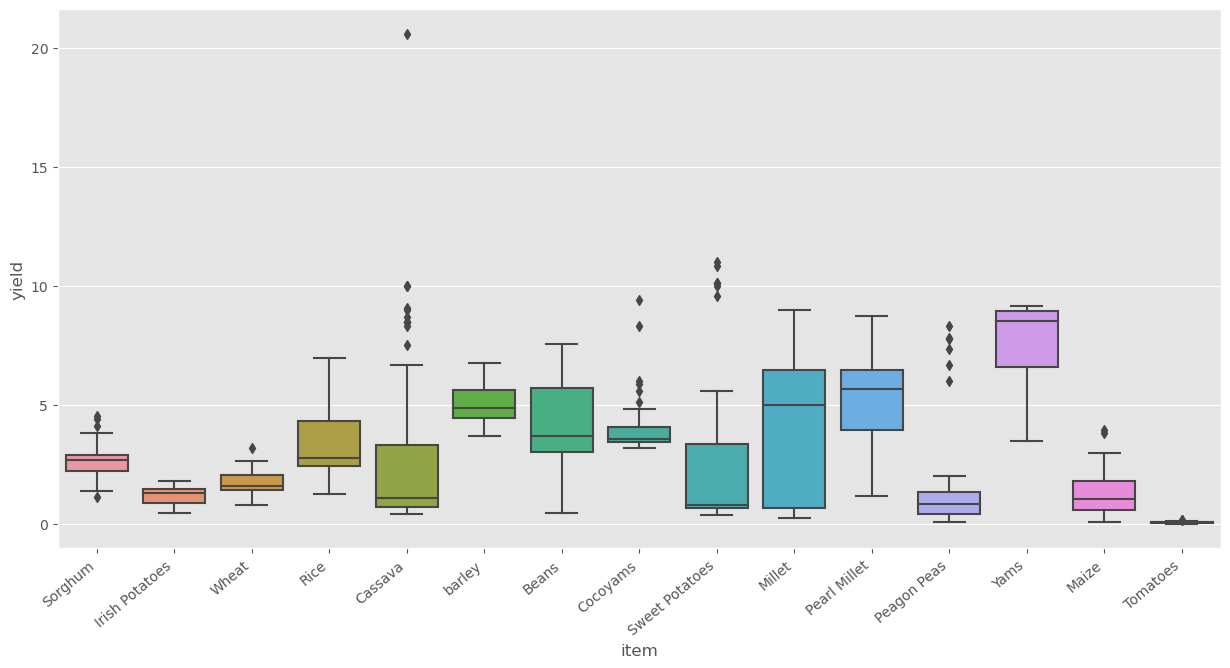

In [24]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='item',y='yield',data=crop)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

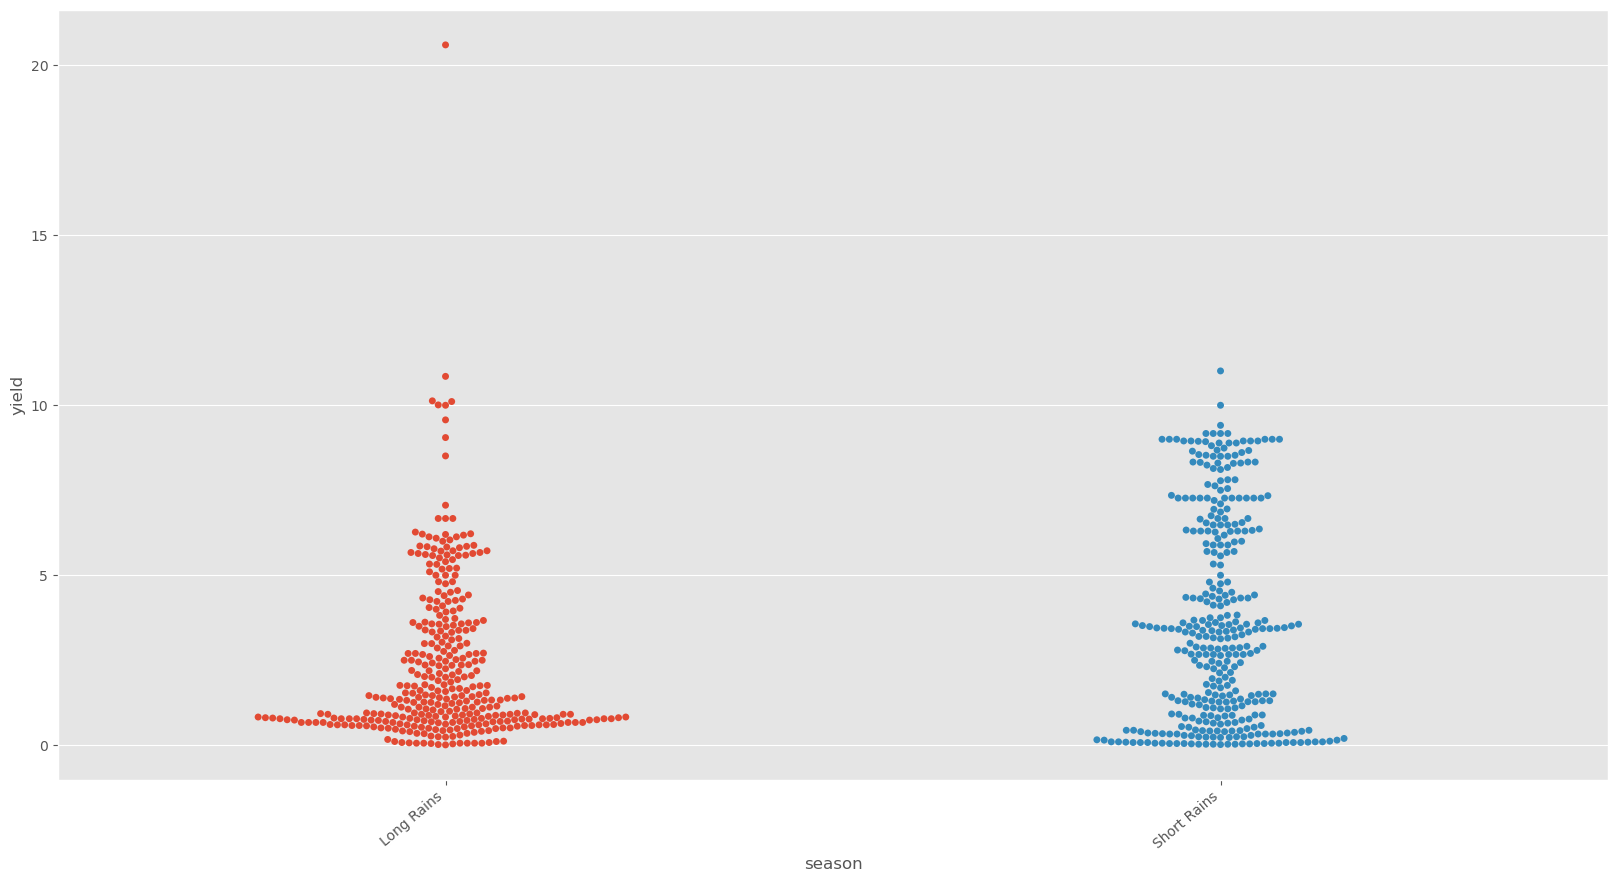

In [25]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='season',y='yield',data=crop)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

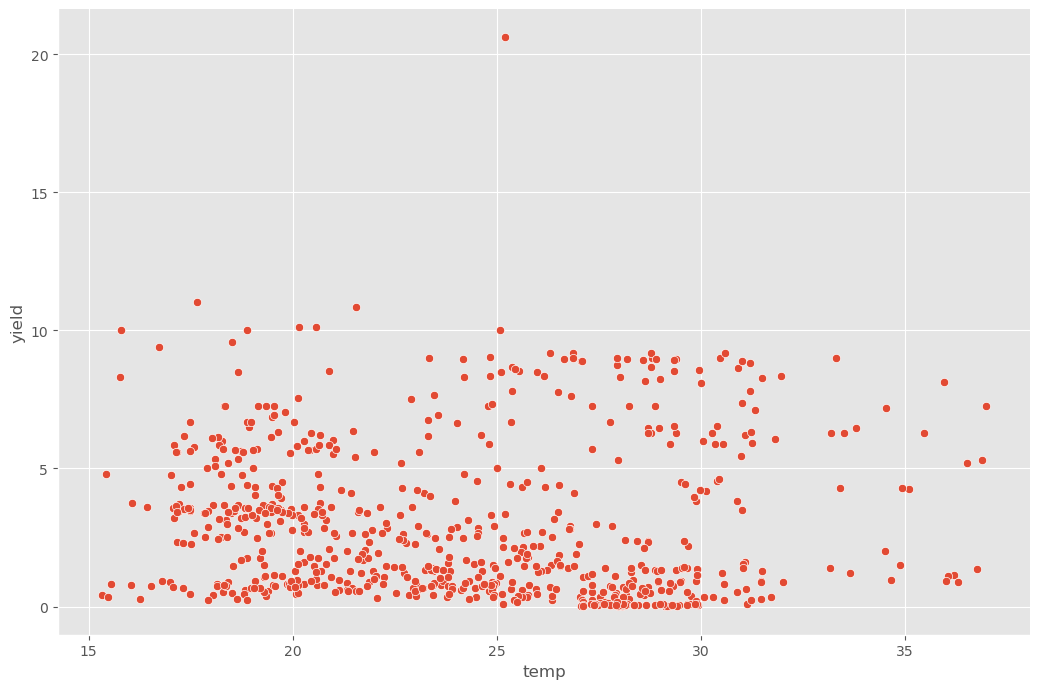

In [26]:
sns.relplot(x='temp',y='yield',data=crop,height=7,aspect=1.5)

<AxesSubplot:xlabel='rainfall', ylabel='yield'>

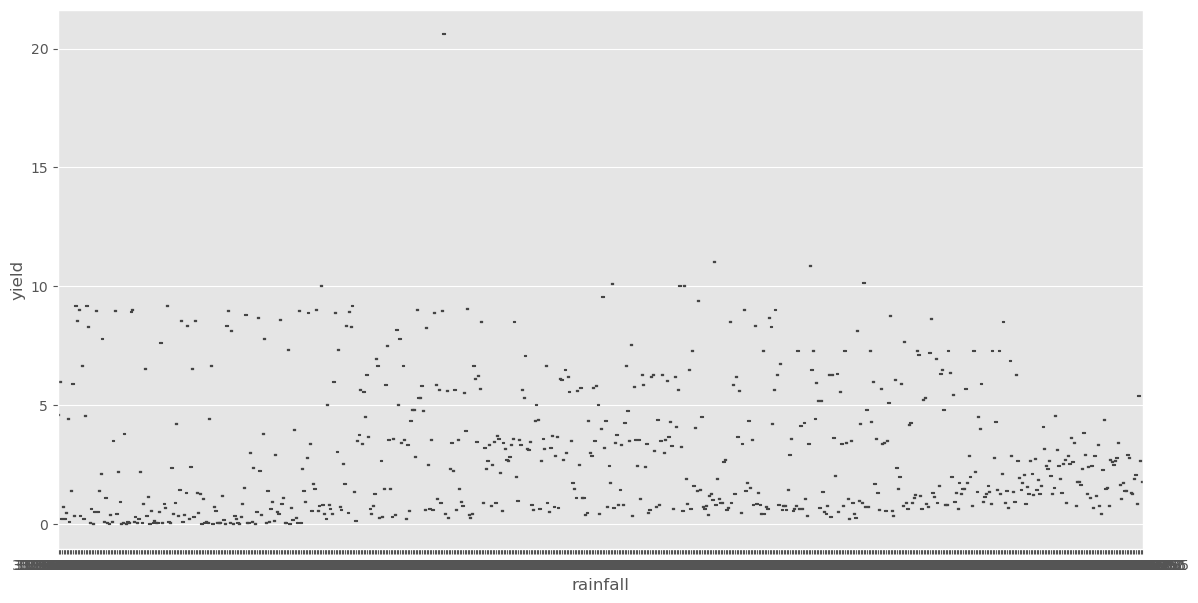

In [27]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='rainfall',y='yield',data=crop)

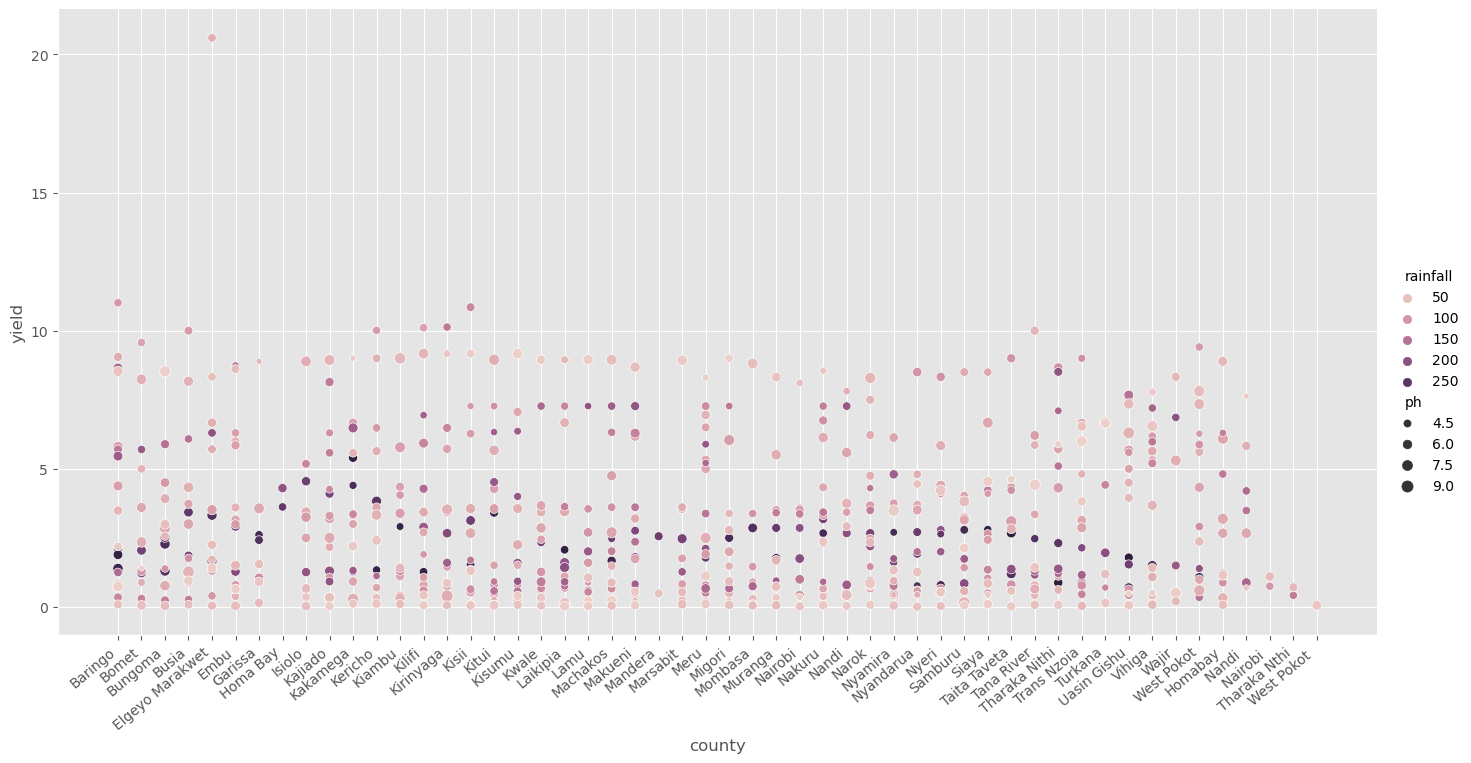

In [28]:
ax=sns.relplot(x='county',y='yield',data=crop,hue='rainfall',size='ph',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [29]:
x=crop[['county','item','season','temp','rainfall','ph']]
y=crop['yield']

In [30]:
x

,county,item,season,temp,rainfall,ph
0,Baringo,Sorghum,Long Rains,20.879744,202.935536,6.502985
1,Bomet,Sorghum,Long Rains,21.770462,226.655537,7.038096
2,Bungoma,Sorghum,Short Rains,23.004459,263.964248,7.840207
3,Busia,Sorghum,Short Rains,26.491096,242.864034,6.980401
4,Elgeyo Marakwet,Sorghum,Long Rains,20.130175,262.717340,7.628473
...,...,...,...,...,...,...
685,Trans Nzoia,Tomatoes,Short Rains,27.385390,58.299331,6.702772
686,Turkana,Tomatoes,Short Rains,27.930349,43.250956,7.011031
687,Uasin Gishu,Tomatoes,Short Rains,29.280862,44.474274,6.890156
688,Vihiga,Tomatoes,Short Rains,28.997315,59.844992,6.821747


In [31]:
y.shape

(690,)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [34]:
ohe=OneHotEncoder()
ohe.fit(x[['county','item','season']])

OneHotEncoder()

In [35]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['county','item','season']),
                                    remainder='passthrough')

In [36]:
lr=LinearRegression()

In [37]:
pipe=make_pipeline(column_trans,lr)

In [38]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([' West Pokot ', 'Baringo', 'Bomet', 'Bungoma', 'Busia',
       'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Homabay',
       'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi',
       'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'L...
       'Tharaka Nthi', 'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga',
       'Wajir', 'West Pokot'], dtype=object),
                                                                            array(['Beans', 'Cassava', 'Cocoyams', 'Irish Potatoes', 'Maize',
       'Millet', 'Peagon Peas', 'Pearl Millet', 'Rice', 'Sorghum',
       'Sweet Potatoes', 'Tomatoes', 'Wheat', 'Yams', 'barley'],
      dtype=object),
                                                                            arr

In [39]:
y_pred=pipe.predict(x_test)

In [40]:
r2_score(y_test,y_pred)

0.46483484467881475

In [41]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [43]:
np.argmax(scores)

633

In [44]:
scores[np.argmax(scores)]

0.7386339866821745

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.7386339866821745

In [46]:
import pickle

In [47]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [48]:
pipe.predict(pd.DataFrame(columns=['county','item','season','temp','rainfall','ph'],data=np.array(['Baringo','Maize','Long Rains',20.879744,202.935536,6.502985]).reshape(1,6)))

array([1.84166209])

In [49]:
pipe.steps[0][1].transformers[0][1].categories[0]

array([' West Pokot ', 'Baringo', 'Bomet', 'Bungoma', 'Busia',
       'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Homabay',
       'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi',
       'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia',
       'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru',
       'Migori', 'Mombasa', 'Muranga', 'Nairobi', 'Nairobi ', 'Nakuru',
       'Nandi', 'Nandi ', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri',
       'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi',
       'Tharaka Nthi', 'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga',
       'Wajir', 'West Pokot'], dtype=object)